<a href="https://colab.research.google.com/github/KashishChanana/Computer-Vision/blob/master/Image_Manipulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#Transformations
Transformations- geometric distortions enacted upon an image. 

2 types- Afines and Non Affine

Affine- scaling, rotation, translation - preserve parallelism, length, angle

Non Affine- aka Homography- collinearity is preserved. parallelism, length, angles aren't- CAMSCANNER

# Translations

along x axis

along y axis

along x-y axis





In [0]:
image=cv2.imread('IMG_0957.JPG')
#cv2_imshow(image)

In [0]:
height, width= image.shape[:2]

In [0]:
quarter_height, quarter_width= height/4, width/4

#    |1 0 Tx|
# T= |0 1 Ty|

T=np.float32([[1,0, quarter_width], [0,1, quarter_height]])

In [0]:
img_translation= cv2.warpAffine(image, T, (width, height))

In [0]:
cv2_imshow(img_translation)

In [0]:
 cv2.destroyAllWindows()

#Rotation

In [0]:
#rotation about center, angle of rotation, scale
rotation_matrix= cv2.getRotationMatrix2D((width/2, height/2), 90,0.50)

In [0]:
rotated_image=cv2.warpAffine(image, rotation_matrix, (width, height))
cv2_imshow(rotated_image)

In [0]:
rotated= cv2.transpose(image)
cv2_imshow(rotated)

#Re-sizing, Scaling, Interpolation

In [0]:
image_scaled= cv2.resize(image, None, fx=0.25,fy=0.25)
cv2_imshow(image_scaled)

In [0]:
img_scaled= cv2.resize(image, (200,200), interpolation=cv2.INTER_AREA)
cv2_imshow(img_scaled)

In [0]:
smaller= cv2.pyrDown(image)
for i in range(4):
  smaller= cv2.pyrDown(smaller) #creates a 50% smaller image each time
  cv2_imshow(smaller)

#Cropping

In [0]:
start_row, start_col= int(height*.50), int(width* .50)
end_row, end_col= int(height* 1), int(width*1)
cropped= image[start_row:end_row, end_row :end_col]
cv2_imshow(cropped)

#Arithmetic Operations

In [0]:
M= np.ones(image.shape, dtype='uint8')*75

In [0]:
added= cv2.add(image, M)
cv2_imshow(added)

In [0]:
subtracted= cv2.subtract(image, M)
cv2_imshow(subtracted)

#Blurring

In [0]:
kernel_10= np.ones((10,10), np.float32)/100

In [0]:
blurred= cv2.filter2D(image,-1, kernel_10)
cv2_imshow(blurred)

In [0]:
blur=cv2.blur(image, (5,5)) # takes a 5x5 box averages and replaces the central element
cv2_imshow(blur)

#Sharpening

In [0]:
kernel_sharpening= np.array([[-1,-1,-1], [-1,9,-1],[-1,-1,-1]])

In [0]:
sharpened=cv2.filter2D(image, -1, kernel_sharpening)
cv2_imshow(sharpened)

#Edge Detection

sudden changes (discontinuities) in an image- intensity changes

3 types of edge detection algorithms
sobel, laplacian, canny(really good)

Canny- guassian blurring- find intensity gradient of the image- removes pixels that arent edges- applies threshold

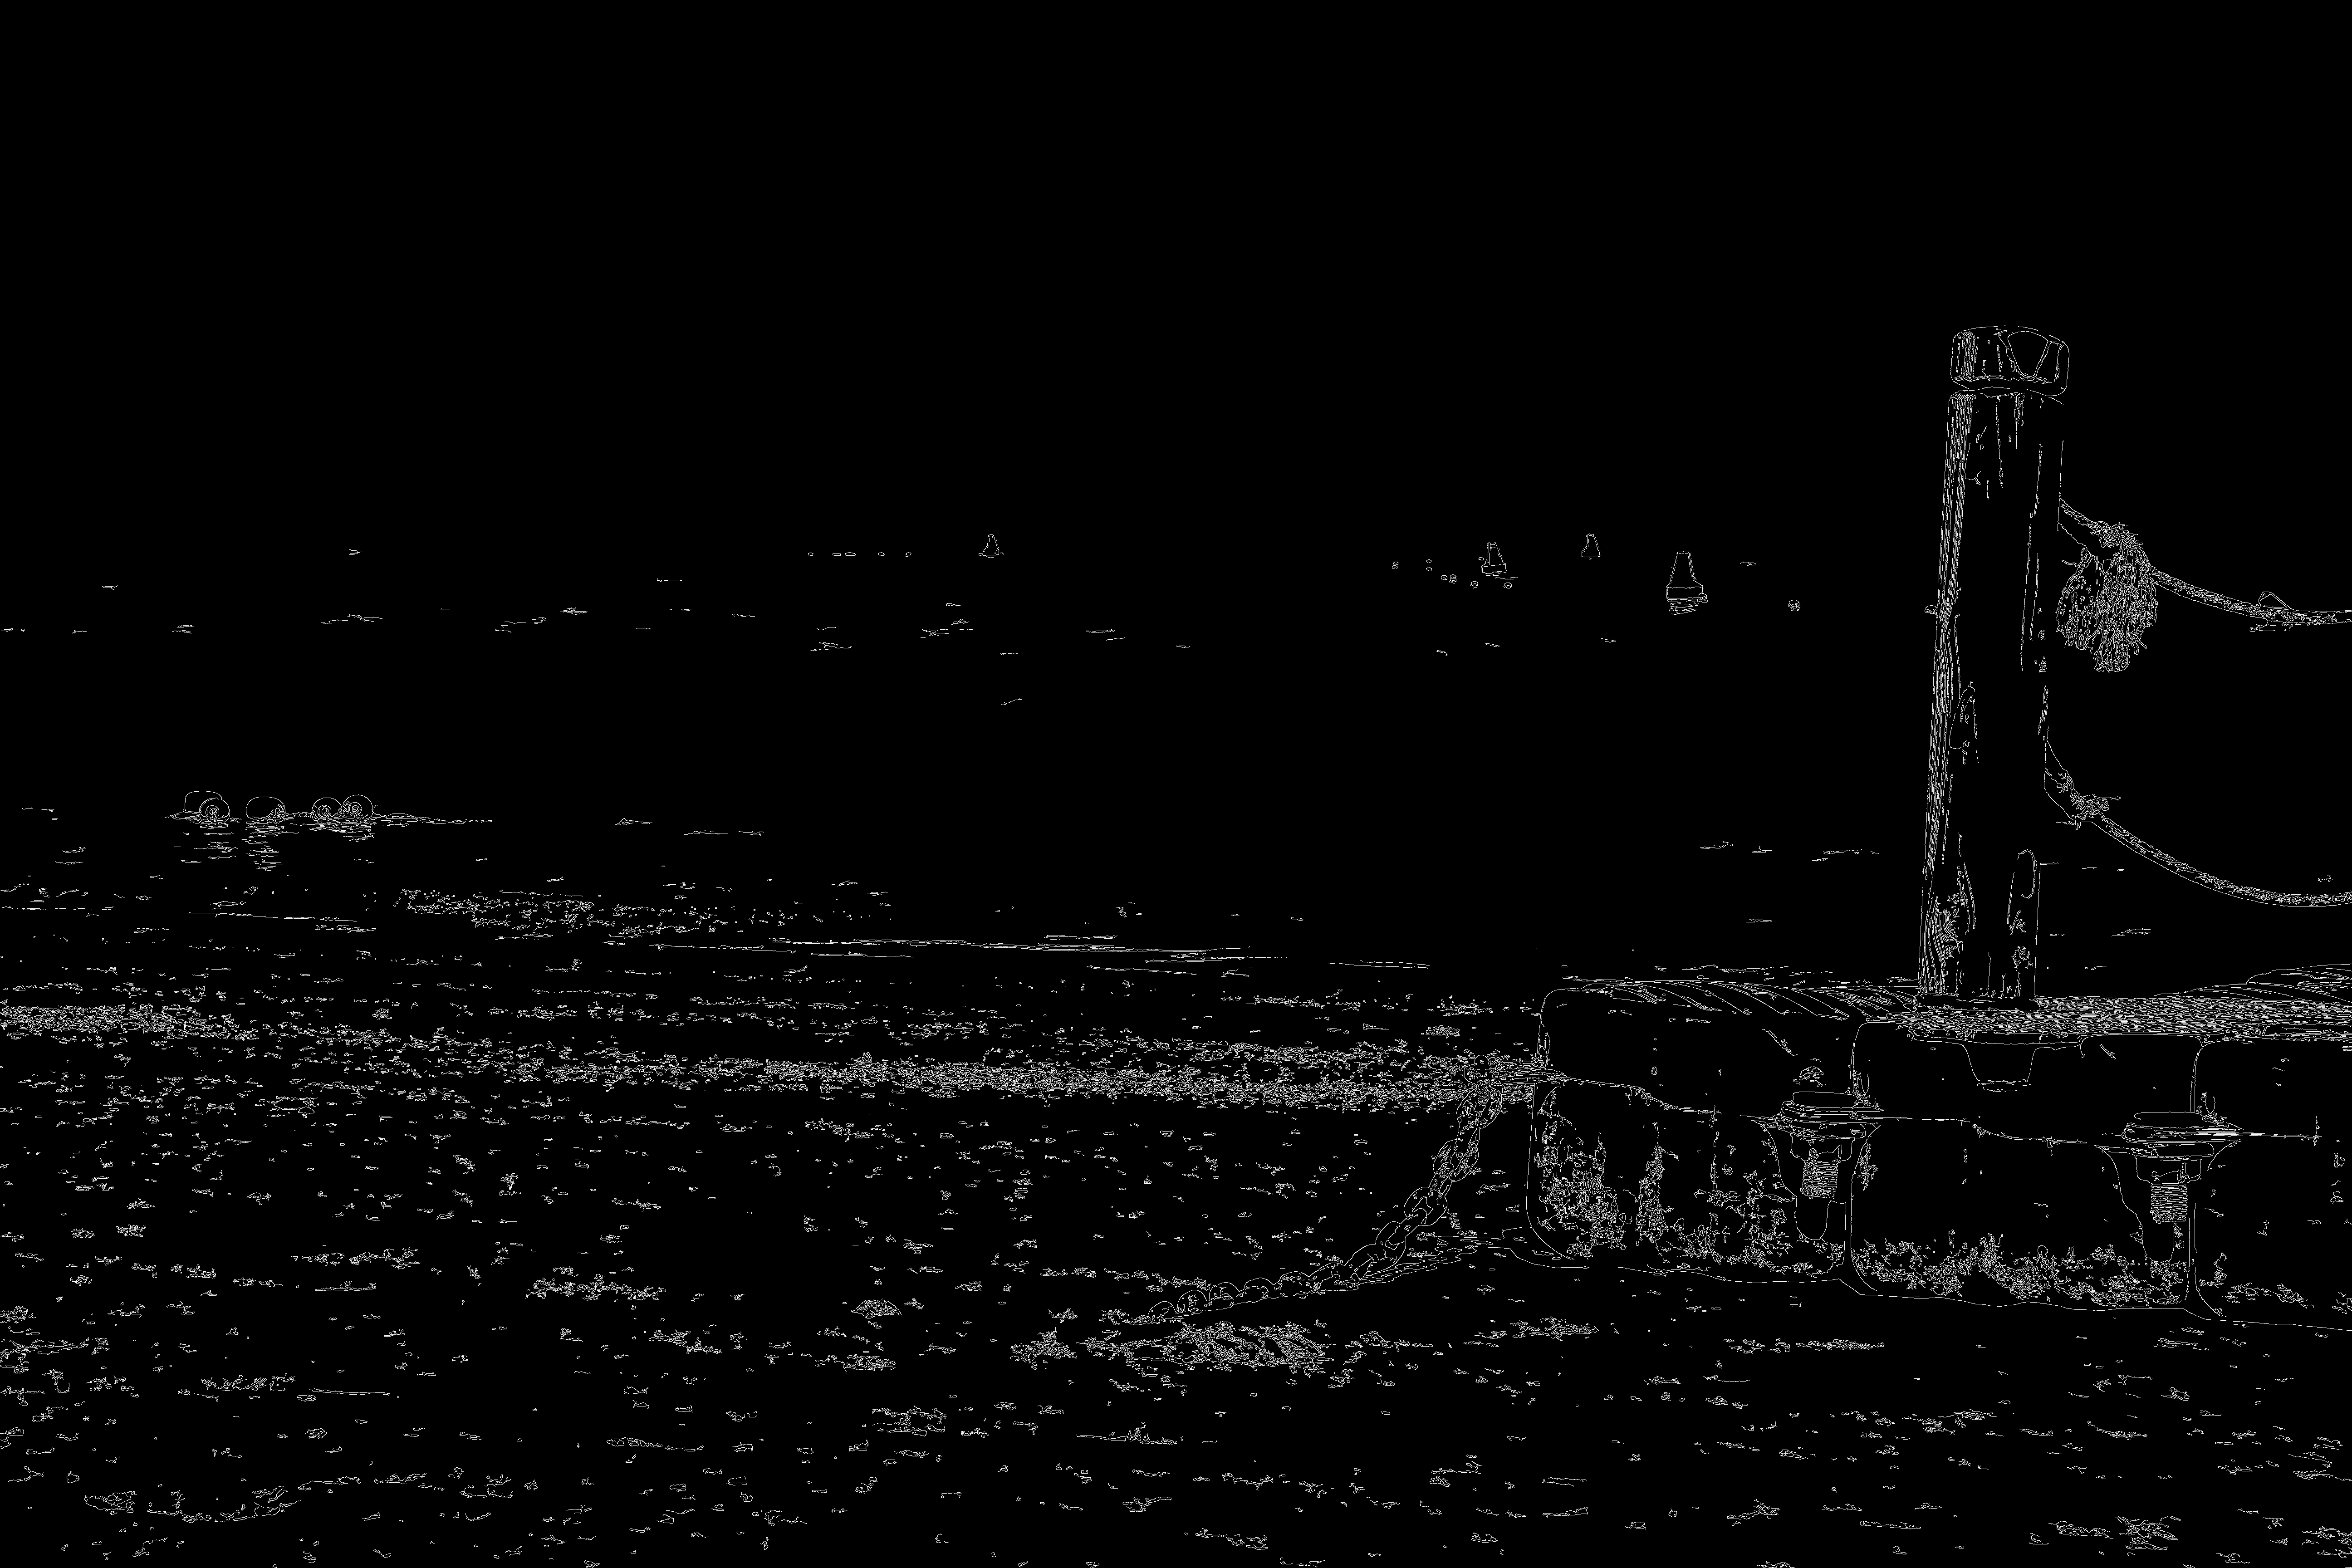

In [81]:
canny= cv2.Canny(image, 20,170) # image, threshold1 , threshold2
cv2_imshow(canny)

In [0]:
#above threshold2 isnt an edge
#below threshold1 isnt an edge